In [1]:
import numpy as np
import scipy
import cv2
import skimage.io as skio

# Part 1

#### Part 1.1

In [2]:
def pad(signal, kernel, mode='full'):
    kernel_height, kernel_width = kernel.shape
    if mode == 'full':
        return np.pad(signal, ((kernel_height - 1, kernel_height - 1), (kernel_width - 1, kernel_width - 1)))
    elif mode == 'same':
        if kernel_height % 2 == 0:
            pad_height_before = kernel_height // 2
            pad_height_after = kernel_height // 2 - 1
        else:
            pad_height_before, pad_height_after = kernel_height // 2, kernel_height // 2
        if kernel_width % 2 == 0:
            pad_width_before = kernel_width // 2
            pad_width_after = kernel_width // 2 - 1
        else:
            pad_width_before, pad_width_after = kernel_width // 2, kernel_width // 2
        return np.pad(signal, ((pad_height_before, pad_height_after), (pad_width_before, pad_width_after)))
    elif mode == 'valid':
        return signal
    else:
        print("Padding mode not supported")
        return

In [3]:
def convolve_naive(signal, kernel, mode='full'):
    signal = pad(signal, kernel, mode)
    kernel = kernel[::-1, ::-1]

    kernel_height, kernel_width = kernel.shape
    signal_height, signal_width = signal.shape

    curr_res = None
    for signal_row in range(signal_height - kernel_height + 1):
        curr_row = []
        for signal_col in range(signal_width - kernel_width + 1):
            # Convolve
            curr_convolve_res = 0
            for kernel_row in range(kernel_height):
                for kernel_col in range(kernel_width):
                    curr_convolve_res += kernel[kernel_row][kernel_col] * signal[signal_row + kernel_row][signal_col + kernel_col]
            curr_row.append(curr_convolve_res)

        if curr_res is None:
            curr_res = np.array([curr_row])
        else:
            curr_res = np.vstack((curr_res, curr_row))
    
    return curr_res

In [4]:
def convolve_optimized(signal, kernel, mode='full'):
    signal = pad(signal, kernel, mode)
    kernel = kernel[::-1, ::-1]

    kernel_height, kernel_width = kernel.shape
    signal_height, signal_width = signal.shape

    curr_res = None
    for signal_row in range(signal_height - kernel_height + 1):
        curr_row = []
        for signal_col in range(signal_width - kernel_width + 1):
            # Convolve
            convolve_res = np.sum(signal[signal_row:signal_row + kernel_height, signal_col:signal_col + kernel_width] * kernel)
            curr_row.append(convolve_res)

        if curr_res is None:
            curr_res = np.array([curr_row])
        else:
            curr_res = np.vstack((curr_res, curr_row))
    
    return curr_res

In [5]:
def convolve_optimized2(signal, kernel, mode='full'):
    signal = pad(signal, kernel, mode)
    kernel = kernel[::-1, ::-1]

    kernel_height, kernel_width = kernel.shape
    signal_height, signal_width = signal.shape

    res_height, res_width = signal_height - kernel_height + 1, signal_width - kernel_width + 1

    curr_res = np.zeros((res_height, res_width))
    for kernel_row in range(kernel_height):
        curr_row = []
        for kernel_col in range(kernel_width):
            # Convolve
            convolve_res = kernel[kernel_row][kernel_col] * signal[kernel_row:kernel_row + res_height, kernel_col:kernel_col + res_width]
            curr_res += convolve_res
    
    return curr_res

#### Part 1.1 testing

In [6]:
img = cv2.imread("data/1.1/original2.jpg", 0)
img_float = (img / 255).astype(np.float32)

/var/folders/zd/6l9_l17d02d4msw14wpqz0lw0000gn/T/ipykernel_63018/1685693314.py:1: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  skio.imshow(img_float)
/var/folders/zd/6l9_l17d02d4msw14wpqz0lw0000gn/T/ipykernel_63018/1685693314.py:2: FutureWarning: `show` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  skio.show()


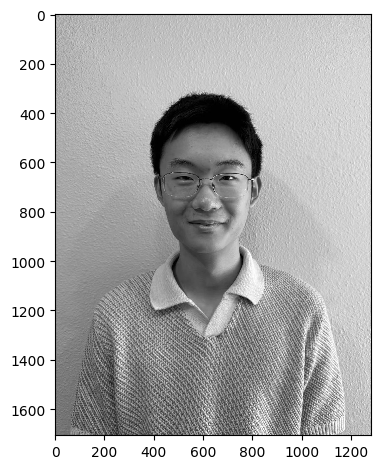

In [13]:
skio.imshow(img_float)
skio.show()
skio.imsave(f"data/1.1/original_grayscale.jpg", (img_float * 255).astype(np.uint8))

In [ ]:
# Testing
box_filter = np.ones((9, 9)) / 81
D_x = np.array([[1, 0, -1]])
D_y = np.array([[1], [0], [-1]])
convolved_res = convolve_optimized2(img_float, D_y)
convolved_res_normalized = (convolved_res + 1) / 2 # Comment this line out if doing box filter.

/var/folders/zd/6l9_l17d02d4msw14wpqz0lw0000gn/T/ipykernel_63018/2294064348.py:1: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  skio.imshow(convolved_res_normalized)
/var/folders/zd/6l9_l17d02d4msw14wpqz0lw0000gn/T/ipykernel_63018/2294064348.py:2: FutureWarning: `show` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  skio.show()


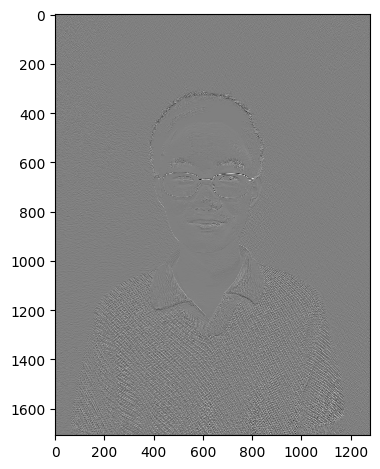

In [ ]:
skio.imshow(convolved_res_normalized)
skio.show()
skio.imsave(f"data/1.1/dy_np.jpg", (convolved_res_normalized * 255).astype(np.uint8))

#### Part 1.2

In [41]:
img = cv2.imread("data/1.2/cameraman.png", 0)
img_float = (img / 255).astype(np.float32)

libpng warning: iCCP: profile 'icc': 0h: PCS illuminant is not D50


In [54]:
# D_x
D_x = np.array([[1, 0, -1]])
res_x = scipy.signal.convolve2d(img_float, D_x, mode="same")

/var/folders/zd/6l9_l17d02d4msw14wpqz0lw0000gn/T/ipykernel_31894/1651552873.py:3: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  skio.imshow(res_int)
/var/folders/zd/6l9_l17d02d4msw14wpqz0lw0000gn/T/ipykernel_31894/1651552873.py:4: FutureWarning: `show` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  skio.show()


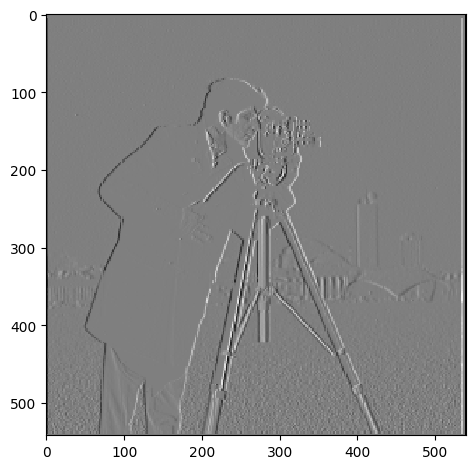

In [55]:
res_normalized = (res_x + 1) / 2
res_int = (res_normalized * 255).astype(np.uint8)
skio.imshow(res_int)
skio.show()
skio.imsave(f"data/1.2/dx_res.jpg", res_int)

In [56]:
# D_y
D_y = np.array([[1], [0], [-1]])
res_y = scipy.signal.convolve2d(img_float, D_y, mode="same")

/var/folders/zd/6l9_l17d02d4msw14wpqz0lw0000gn/T/ipykernel_31894/2845856438.py:3: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  skio.imshow(res_int)
/var/folders/zd/6l9_l17d02d4msw14wpqz0lw0000gn/T/ipykernel_31894/2845856438.py:4: FutureWarning: `show` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  skio.show()


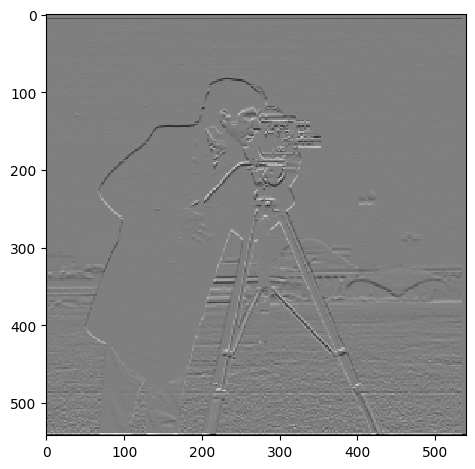

In [57]:
res_normalized = (res_y + 1) / 2
res_int = (res_normalized * 255).astype(np.uint8)
skio.imshow(res_int)
skio.show()
skio.imsave(f"data/1.2/dy_res.jpg", res_int)

/var/folders/zd/6l9_l17d02d4msw14wpqz0lw0000gn/T/ipykernel_31894/365596594.py:4: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  skio.imshow(gradient_magnitude_int)
/var/folders/zd/6l9_l17d02d4msw14wpqz0lw0000gn/T/ipykernel_31894/365596594.py:5: FutureWarning: `show` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  skio.show()


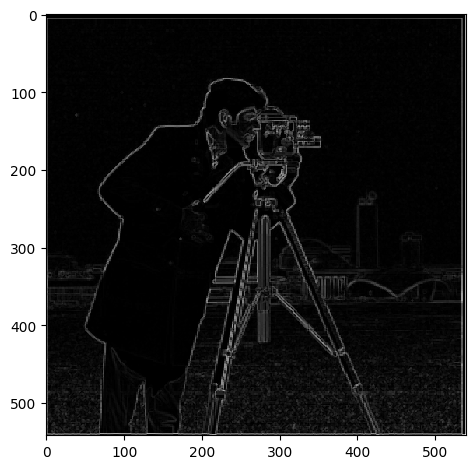

In [62]:
# Gradient Magnitude Image
gradient_magnitude = np.sqrt(res_x ** 2 + res_y ** 2)
gradient_magnitude_int = ((gradient_magnitude / np.sqrt(2)) * 255).astype(np.uint8)
skio.imshow(gradient_magnitude_int)
skio.show()
skio.imsave(f"data/1.2/raw_gradient_magnitude.jpg", gradient_magnitude_int)

/var/folders/zd/6l9_l17d02d4msw14wpqz0lw0000gn/T/ipykernel_31894/119338540.py:4: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  skio.imshow(binarized_255)
/var/folders/zd/6l9_l17d02d4msw14wpqz0lw0000gn/T/ipykernel_31894/119338540.py:5: FutureWarning: `show` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  skio.show()


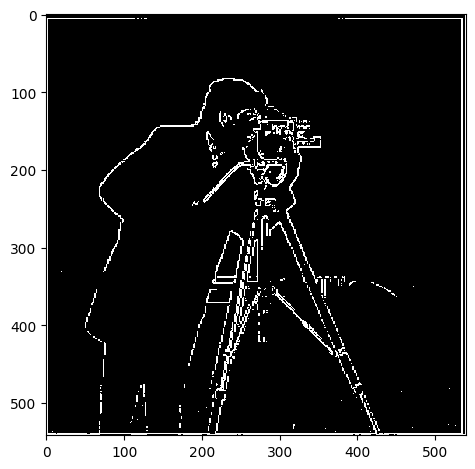

In [76]:
# binarize
binarized = np.ones(gradient_magnitude.shape) * (gradient_magnitude > 0.33)
binarized_255 = (binarized * 255).astype(np.uint8)
skio.imshow(binarized_255)
skio.show()
skio.imsave(f"data/1.2/binarized.jpg", binarized_255)

#### Part 1.3

In [77]:
kernel_width = 9
gaussian_kernel = cv2.getGaussianKernel(kernel_width, kernel_width / 6) @ cv2.getGaussianKernel(kernel_width, kernel_width / 6).T

In [78]:
img = cv2.imread("data/1.3/cameraman.png", 0)
img_float = (img / 255).astype(np.float32)

libpng warning: iCCP: profile 'icc': 0h: PCS illuminant is not D50


/var/folders/zd/6l9_l17d02d4msw14wpqz0lw0000gn/T/ipykernel_49179/291748259.py:3: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  skio.imshow(convolved_res_gaussian)
/var/folders/zd/6l9_l17d02d4msw14wpqz0lw0000gn/T/ipykernel_49179/291748259.py:4: FutureWarning: `show` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  skio.show()


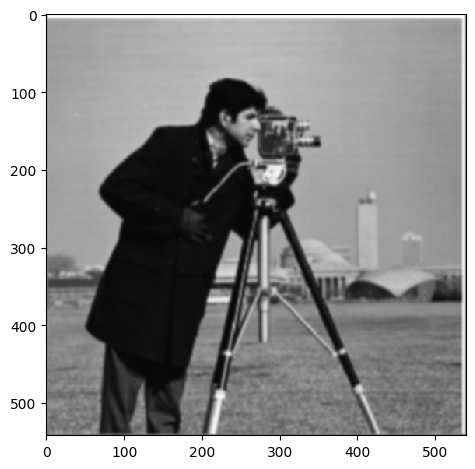

In [79]:
# Blurred image
convolved_res_gaussian = convolve_optimized2(img_float, gaussian_kernel, mode='same')
skio.imshow(convolved_res_gaussian)
skio.show()
convolved_res_gaussian_int = (convolved_res_gaussian * 255).astype(np.uint8)
skio.imsave(f"data/1.3/blurred.jpg", convolved_res_gaussian_int)

/var/folders/zd/6l9_l17d02d4msw14wpqz0lw0000gn/T/ipykernel_49179/2048312002.py:6: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  skio.imshow(res_int)
/var/folders/zd/6l9_l17d02d4msw14wpqz0lw0000gn/T/ipykernel_49179/2048312002.py:7: FutureWarning: `show` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  skio.show()


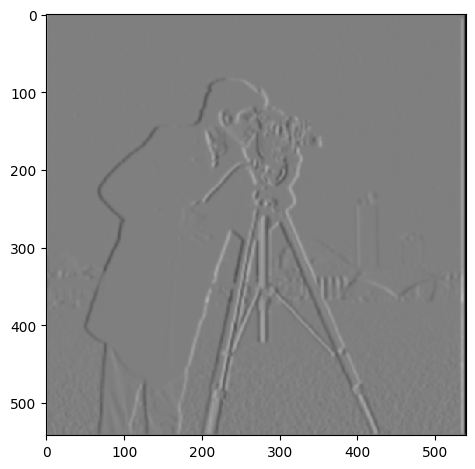

In [80]:
# D_x
D_x = np.array([[1, 0, -1]])
res_x = scipy.signal.convolve2d(convolved_res_gaussian, D_x, mode="same")
res_normalized = (res_x + 1) / 2
res_int = (res_normalized * 255).astype(np.uint8)
skio.imshow(res_int)
skio.show()
skio.imsave(f"data/1.3/dx_res.jpg", res_int)

/var/folders/zd/6l9_l17d02d4msw14wpqz0lw0000gn/T/ipykernel_49179/1712469385.py:6: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  skio.imshow(res_int)
/var/folders/zd/6l9_l17d02d4msw14wpqz0lw0000gn/T/ipykernel_49179/1712469385.py:7: FutureWarning: `show` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  skio.show()


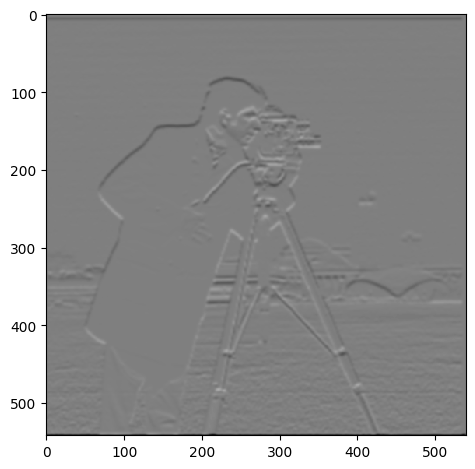

In [81]:
# D_y
D_y = np.array([[1], [0], [-1]])
res_y = scipy.signal.convolve2d(convolved_res_gaussian, D_y, mode="same")
res_normalized = (res_y + 1) / 2
res_int = (res_normalized * 255).astype(np.uint8)
skio.imshow(res_int)
skio.show()
skio.imsave(f"data/1.3/dy_res.jpg", res_int)

/var/folders/zd/6l9_l17d02d4msw14wpqz0lw0000gn/T/ipykernel_49179/1609021777.py:4: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  skio.imshow(gradient_magnitude_int)
/var/folders/zd/6l9_l17d02d4msw14wpqz0lw0000gn/T/ipykernel_49179/1609021777.py:5: FutureWarning: `show` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  skio.show()


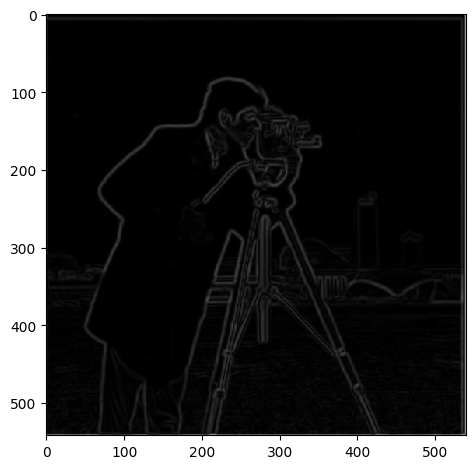

In [82]:
# Gradient Magnitude Image
gradient_magnitude = np.sqrt(res_x ** 2 + res_y ** 2)
gradient_magnitude_int = ((gradient_magnitude / np.sqrt(2)) * 255).astype(np.uint8)
skio.imshow(gradient_magnitude_int)
skio.show()
skio.imsave(f"data/1.3/raw_gradient_magnitude.jpg", gradient_magnitude_int)

/var/folders/zd/6l9_l17d02d4msw14wpqz0lw0000gn/T/ipykernel_49179/3744944560.py:4: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  skio.imshow(binarized_255)
/var/folders/zd/6l9_l17d02d4msw14wpqz0lw0000gn/T/ipykernel_49179/3744944560.py:5: FutureWarning: `show` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  skio.show()


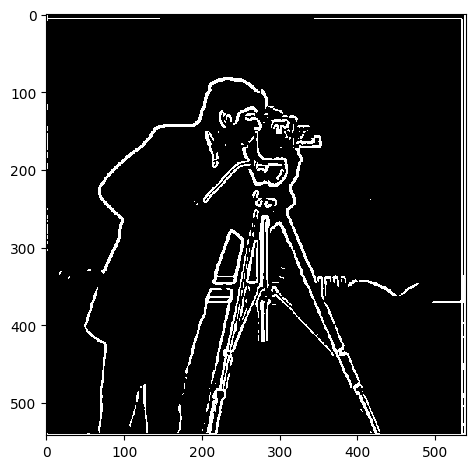

In [83]:
# binarize
binarized = np.ones(gradient_magnitude.shape) * (gradient_magnitude > 0.1477)
binarized_255 = (binarized * 255).astype(np.uint8)
skio.imshow(binarized_255)
skio.show()
skio.imsave(f"data/1.3/binarized.jpg", binarized_255)

/var/folders/zd/6l9_l17d02d4msw14wpqz0lw0000gn/T/ipykernel_49179/3024090671.py:7: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  skio.imshow(DOG_x_visualize)
/var/folders/zd/6l9_l17d02d4msw14wpqz0lw0000gn/T/ipykernel_49179/3024090671.py:8: FutureWarning: `show` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  skio.show()


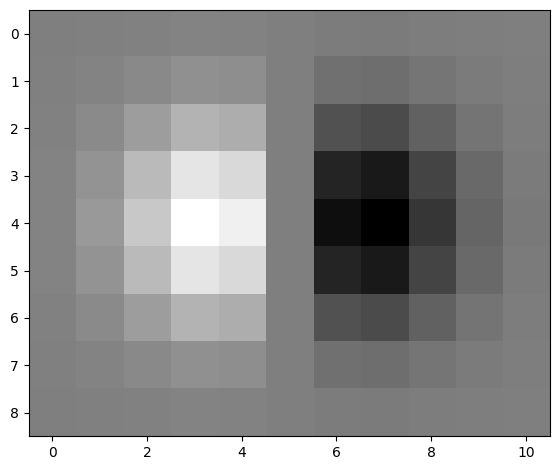

In [84]:
# Derivative of Gaussian in the x direction: construction.
DOG_x = scipy.signal.convolve2d(gaussian_kernel, D_x)
DOG_x_visualize = DOG_x - np.min(DOG_x)
DOG_x_visualize = DOG_x_visualize / np.max(DOG_x_visualize)
DOG_x_visualize = (DOG_x_visualize * 255).astype(np.uint8)

skio.imshow(DOG_x_visualize)
skio.show()
skio.imsave(f"data/1.3/DOG_x.jpg", DOG_x_visualize)

/var/folders/zd/6l9_l17d02d4msw14wpqz0lw0000gn/T/ipykernel_49179/3398872302.py:5: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  skio.imshow(res_int)
/var/folders/zd/6l9_l17d02d4msw14wpqz0lw0000gn/T/ipykernel_49179/3398872302.py:6: FutureWarning: `show` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  skio.show()


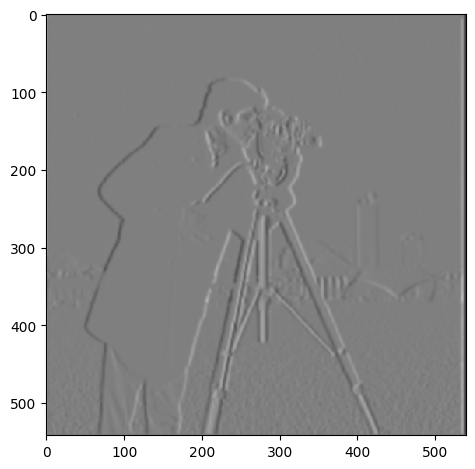

In [85]:
# Derivative of Gaussian in the x direction: results.
res_x_2 = scipy.signal.convolve2d(img_float, DOG_x, mode="same")
res_normalized = (res_x_2 + 1) / 2
res_int = (res_normalized * 255).astype(np.uint8)
skio.imshow(res_int)
skio.show()
skio.imsave(f"data/1.3/dx_res_2.jpg", res_int)

/var/folders/zd/6l9_l17d02d4msw14wpqz0lw0000gn/T/ipykernel_49179/2099956498.py:7: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  skio.imshow(DOG_y_visualize)
/var/folders/zd/6l9_l17d02d4msw14wpqz0lw0000gn/T/ipykernel_49179/2099956498.py:8: FutureWarning: `show` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  skio.show()


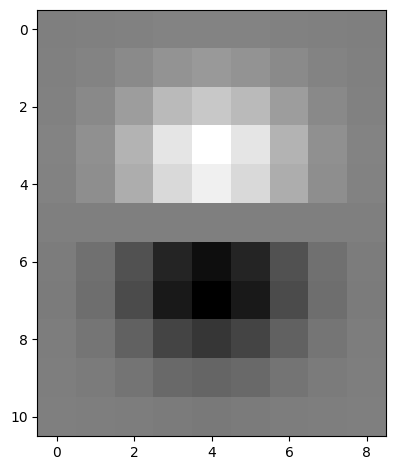

In [86]:
# Derivative of Gaussian in the y direction: construction.
DOG_y = scipy.signal.convolve2d(gaussian_kernel, D_y)
DOG_y_visualize = DOG_y - np.min(DOG_y)
DOG_y_visualize = DOG_y_visualize / np.max(DOG_y_visualize)
DOG_y_visualize = (DOG_y_visualize * 255).astype(np.uint8)

skio.imshow(DOG_y_visualize)
skio.show()
skio.imsave(f"data/1.3/DOG_y.jpg", DOG_y_visualize)

/var/folders/zd/6l9_l17d02d4msw14wpqz0lw0000gn/T/ipykernel_49179/2511131396.py:5: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  skio.imshow(res_int)
/var/folders/zd/6l9_l17d02d4msw14wpqz0lw0000gn/T/ipykernel_49179/2511131396.py:6: FutureWarning: `show` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  skio.show()


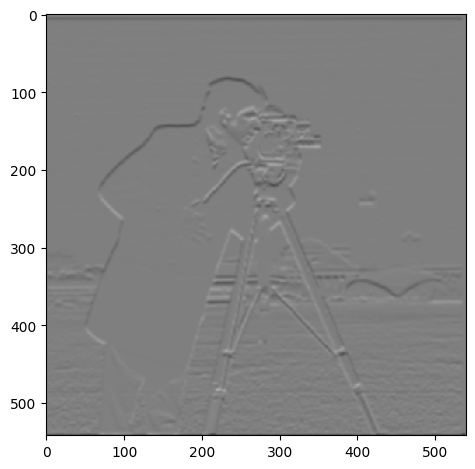

In [87]:
# Derivative of Gaussian in the y direction: results.
res_y_2 = scipy.signal.convolve2d(img_float, DOG_y, mode="same")
res_normalized = (res_y_2 + 1) / 2
res_int = (res_normalized * 255).astype(np.uint8)
skio.imshow(res_int)
skio.show()
skio.imsave(f"data/1.3/dy_res_2.jpg", res_int)

/var/folders/zd/6l9_l17d02d4msw14wpqz0lw0000gn/T/ipykernel_49179/1087274512.py:4: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  skio.imshow(gradient_magnitude_int)
/var/folders/zd/6l9_l17d02d4msw14wpqz0lw0000gn/T/ipykernel_49179/1087274512.py:5: FutureWarning: `show` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  skio.show()


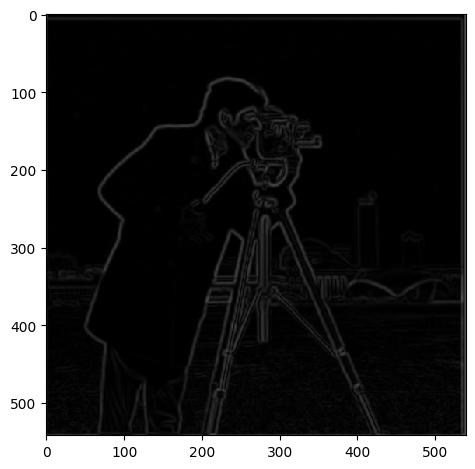

In [88]:
# Gradient Magnitude Image, a second way
gradient_magnitude_2 = np.sqrt(res_x_2 ** 2 + res_y_2 ** 2)
gradient_magnitude_int = ((gradient_magnitude_2 / np.sqrt(2)) * 255).astype(np.uint8)
skio.imshow(gradient_magnitude_int)
skio.show()
skio.imsave(f"data/1.3/raw_gradient_magnitude_2.jpg", gradient_magnitude_int)

/var/folders/zd/6l9_l17d02d4msw14wpqz0lw0000gn/T/ipykernel_49179/709269558.py:4: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  skio.imshow(binarized_255)
/var/folders/zd/6l9_l17d02d4msw14wpqz0lw0000gn/T/ipykernel_49179/709269558.py:5: FutureWarning: `show` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  skio.show()


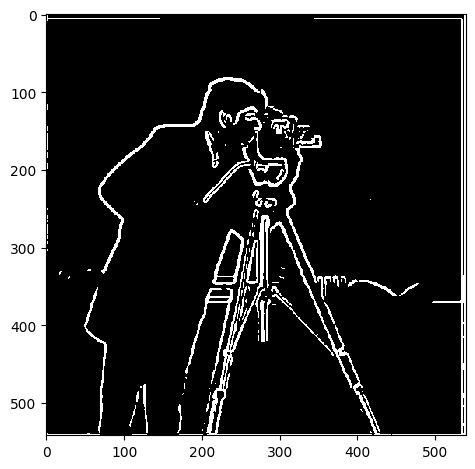

In [89]:
# binarize
binarized = np.ones(gradient_magnitude_2.shape) * (gradient_magnitude_2 > 0.1477)
binarized_255 = (binarized * 255).astype(np.uint8)
skio.imshow(binarized_255)
skio.show()
skio.imsave(f"data/1.3/binarized_2.jpg", binarized_255)